# Machine Learning with Python

Speaker: Yingzhi Gou

Decision Systems Lab,

University of Wollongong

**NOTE** this jupyter notebook is available on github https://github.com/YingzhiGou/AI-Meetup-Decision-Systems-Lab-UOW


# Acknowledgement

source code in this tutorial is based on the book **Hands-On Machine Learning with Scikit-Learn and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems** by *Aurélien Géron*

# Software Required

* python 3.5
* numpy
* jupyter
* matplotlib
* scikit-learn

# Classification

to identify to which of the categories a new observation (data entry) belongs, based on the training data.

# Data Set

## MNIST data set

A set of 70,000 small impages of digits handwritten by high school students and employees of the US Census Bureau. 

Each image is labelled with the digit it represents (so we can do supervised learning with this data set).

In [12]:
# fetch data set
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')  # download data here, it may take some time depends on the network
mnist  # this will show the dataset object

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [13]:
# now let's take a look at the data
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [14]:
y.shape

(70000,)

In [16]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# define a function that display the digit image
def show_digit(pixels):
    digit_image = pixels.reshape(28,28)
    plt.imshow(digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")
    plt.show()

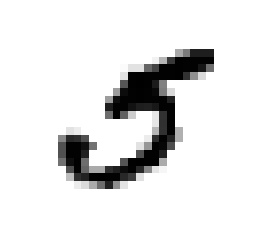

In [17]:
some_digit = X[36000] # select some digit data
show_digit(some_digit)

In [18]:
y[36000]

5.0

# Prepare Data for Learning

## Training data
normally 60%~70% of the labeled data set

## Testing data
the rest of the data set

**NOTE** their are may way to simple the training data, e.g. partation, random simpling, simpling based on the class distribuction of the data set etc. Beware of possible bais introduced in simpling.

In [19]:
# create training and testing sets
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# shuffling the data set
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

# Binary Classification

For one class, build one classifier.

In this case, let's build a classifier for digit '5'.

In [20]:
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits
y_test_5 = (y_test == 5)

## Stochastic Gradient Descent (SGD)

Now let's pick our fist binary classifier.

SGD is capable of handling very large dataset efficiently, because it deals with training instances independently, one at a time (suited for *online training*)

In [21]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
# GSD relies on randomness during training, so if you want reproducible results, random_state should be set
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [24]:
# let's test the model
sgd_clf.predict([some_digit])

array([ True], dtype=bool)

In [26]:
sgd_clf.predict([X[23423]])

array([False], dtype=bool)

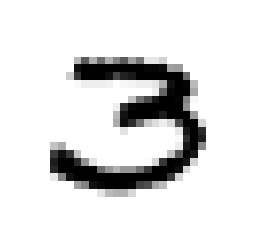

In [28]:
show_digit(X[23423])

# Performance Measures

Evaluate a classifier is often tricky. There are many performance measures with their own advantages and disadvantages. We will talk about the related concepts more later.

## Cross Validation

We will use $cross_val_score()$ function provided by $sklearn.model_selection$ module, which using K-fold cross-validation. 

K-fold Cross Validation means to split the training set into K-folds then making prediction and evaluating them on each fold using a model trained on the remaining folds.

In [30]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=5, scoring='accuracy')

array([ 0.93067244,  0.95808333,  0.95925   ,  0.96283333,  0.94374531])

about 95% accuracy!!! but ...

In [32]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=5, scoring='accuracy')

array([ 0.9065    ,  0.91275   ,  0.90641667,  0.91525   ,  0.90733333])

WHY?

because 90% of the data would be "not 5", our data set is biased against "not 5". by simply guessing "not 5", the classifier would have achieve 90% accuracy.

## Confusion Matrix

A much better way to evaluate the performance of a classifier.

In [ ]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=5)

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

NameError: name 'y_train_pred' is not defined